<a href="https://colab.research.google.com/github/Shibu778/MyNotebooks/blob/master/Lyapunov_exponent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
# If found Import Error in the next cell uncomment the following line and run this cell
#!pip install ./nolitsa

In [ ]:
# First Mount the drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
from nolitsa.nolitsa import delay, lyapunov, utils

In [ ]:
cd Sleep data/Rawat\ Sumit\ -\ 06.08.2019

/content/drive/My Drive/Sleep data/Rawat Sumit - 06.08.2019


In [ ]:
# Making a class for analysis
class LEA():  # LEA - Lyapunov exponent analysis

  def __init__(self,filepath_in,maxnum):
    self.filepath_in = filepath_in
    self.maxnum = maxnum

  def txt_to_arr(self,filepath_in):
    '''
    Function : Takes the relative file path and read the *.txt file mentioned in the path and
    gives an numpy array as output.
    Input : filepath
    Output : Numpy array containing the single column signal inside the txt file
    Use the following file format
    filepath = '/content/drive/My Drive/Sleep data/Amit Agrahari/C3 - 14.04.2014.txt'
    txt_to_mat(filepath)
    '''
    df = pd.read_csv(filepath_in,header=None,encoding= 'unicode_escape')
    df = df[6:]
    arr = np.squeeze(df.to_numpy(),axis = 1)
    arr = arr.astype(float)
    print("Length of data : ", len(arr))
    return arr

  def find_mle(self, arr, tau = 1, dim = [2], window = 0):
    """Finds the Lyapunov time series
    
    """
    d = lyapunov.mle_embed(arr, dim=dim, tau=tau, maxt=len(arr), window = window,maxnum = self.maxnum)[0]
    return d

  # Function to calculate all the minima
  def all_minima(self,x):
    minima_list = []
    for i in range(1,len(x)-1):
      if x[i] < x[i-1] and x[i] < x[i+1]:
        minima_list.append(x[i])

    return minima_list

  # Function to calculate the local minima
  def first_local_minima(self, minima_list):
    return minima_list[0]

  def delay_of_lyapunov(self, data):
    R_delay = []
    I_delay = []
    data1 = data[0:1000]
    count = 1000
    for i in range(int(len(data)/1000)):
      # Finding and storing time delay using auto-correlation
      r = delay.acorr(data1, maxtau=50)
      r_delay = np.argmax(r < 1.0 / np.e)
      R_delay.append(r_delay)

      # Finding and using time delay using average mutual information
      i = delay.dmi(data1, maxtau=50)
      allm = all_minima(i)
      i_delay = np.where(i == allm[0])[0][0]
      I_delay.append(i_delay)

      # Accessing next data window of 1000 points
      data1 = data[count-200:count+800]
      count = count + 800

    return R_delay, I_delay

  def lyapunov_analysis(self):
    arr = self.txt_to_arr(self.filepath_in)
    arr = arr[:1000]
    data = self.find_mle(arr)
    R_delay, I_delay = self.delay_of_lyapunov(data)
    # Plotting
    # Figure 1 is for time-delay calculated using autocorrelation
    plt.figure(1)
    plt.plot(R_delay)

    # Figure 2 is for time-delay calculated using AMI
    plt.figure(2)
    plt.plot(I_delay)
    plt.show()
      
    return R_delay, I_delay


In [ ]:
# Functions
def txt_to_arr(filepath_in):
    '''
    Function : Takes the relative file path and read the *.txt file mentioned in the path and
    gives an numpy array as output.
    Input : filepath
    Output : Numpy array containing the single column signal inside the txt file
    Use the following file format
    filepath = '/content/drive/My Drive/Sleep data/Amit Agrahari/C3 - 14.04.2014.txt'
    txt_to_mat(filepath)
    '''
    df = pd.read_csv(filepath_in,header=None,encoding= 'unicode_escape')
    df = df[6:]
    arr = np.squeeze(df.to_numpy(),axis = 1)
    arr = arr.astype(float)
    print("Length of data : ", len(arr))
    return arr

def find_mle(arr, tau = 1, dim = [2], window = 0, maxnum = 10):
    """Finds the Lyapunov time series
    
    """
    d = lyapunov.mle_embed(arr, dim=dim, tau=tau, maxt=len(arr), window = window,maxnum = maxnum)[0]
    return d

In [ ]:
??lyapunov.mle_embed

In [ ]:
len(C3)


4619072

In [ ]:
filepath = 'C3 - 06.08.2019.txt'
C3 = txt_to_arr(filepath)
data = C3[2000:3000]
mle = find_mle(data, tau = 3, dim = [5], window = 100, maxnum = 500)
mle

In [ ]:
arr = np.arange(0)
arr = np.concatenate((arr,np.asarray([5])))
arr

array([5])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
mle_arr = np.arange(0)
for i in range(0,1000):
  data = C3[i*1000:(i+1)*1000]
  mle = find_mle(data, tau = 5, dim = [5], window = 100, maxnum = 500)
  mle_arr = np.concatenate((mle_arr,np.asarray([max(mle)])))

len(mle_arr)

1000

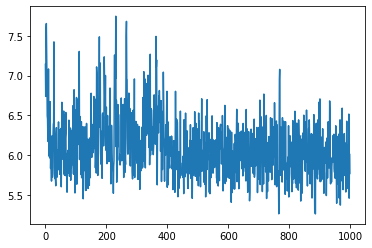

In [ ]:
plt.plot(mle_arr[:1000])

In [ ]:
mle_arr[800:850]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
filepath = 'C3 - 06.08.2019.txt'
analyzer = LEA(filepath,900)
#analyzer.filepath_in = filepath
#data = analyzer.txt_to_arr(filepath)
R_delay, I_delay = analyzer.lyapunov_analysis()

In [ ]:
analyzer.lya

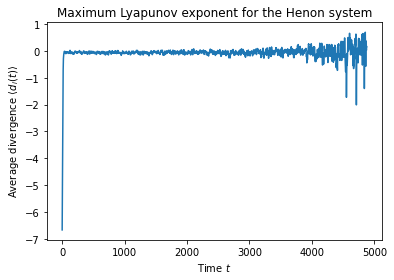

In [ ]:
from nolitsa import data, lyapunov
import numpy as np
import matplotlib.pyplot as plt

x = data.henon(length=5000)[:, 0]

# Time delay.
tau = 1

# Embedding dimension.
dim = [2]

d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=len(x))[0]
t = np.arange(len(x))

plt.title('Maximum Lyapunov exponent for the Henon system')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(t[:len(d)], d)
#plt.plot(t, t * 0.419 + d[0], '--')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from nolitsa import lyapunov, utils

t = np.linspace(0, 100 * np.pi, 5000)
x = np.sin(t) + np.sin(2 * t) + np.sin(3 * t) + np.sin(5 * t)
x = utils.corrupt(x, np.random.normal(size=5000), snr=1000)

# Time delay.
tau = 25

window = 100

# Embedding dimension.
dim = [10]

d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=5000, window=window)[0]



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
d

array([-1.98627666, -1.56246199, -1.53151454, ...,         nan,
               nan,         nan])

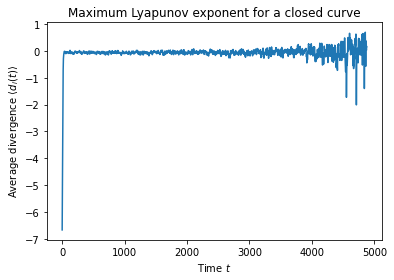

In [ ]:
plt.title('Maximum Lyapunov exponent for a closed curve')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(t[:len(d)], d)

plt.show()

((5000,), (4988,))

Rough work

In [ ]:
def txt_to_arr(filepath_in):
    '''
    Function : Takes the relative file path and read the *.txt file mentioned in the path and
    gives an numpy array as output.
    Input : filepath
    Output : Numpy array containing the single column signal inside the txt file
    Use the following file format
    filepath = '/content/drive/My Drive/Sleep data/Amit Agrahari/C3 - 14.04.2014.txt'
    txt_to_mat(filepath)
    '''
    df = pd.read_csv(filepath_in,header=None,encoding= 'unicode_escape')
    df = df[6:]
    arr = np.squeeze(df.to_numpy(),axis = 1)
    arr = arr.astype(float)
    print("Length of data : ", len(arr))
    return arr

def find_time_delay

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Length of data :  4619072


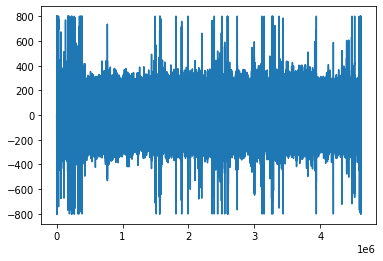

In [ ]:
filepath = 'C3 - 06.08.2019.txt'
C3 = txt_to_arr(filepath)
plt.plot(C3)
plt.show()

In [ ]:
arr = C3[:1000]
# Time delay.
tau = delay.acorr(arr, maxtau = 50)
tau = np.argmax(tau < 1/np.e)
window = 0
# Embedding dimension.
dim = [3]
d = lyapunov.mle_embed(arr, dim=dim, tau=tau, maxt=5000, window=window, maxnum = 900)[0]
d

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([3.28598535, 3.83538362, 4.17545668, 4.30304952, 4.25687187,
       4.10676436, 4.05379631, 4.24947427, 4.42867409, 4.47416185,
       4.35780619, 4.34153722, 4.46603726, 4.58705942, 4.68413777,
       4.68971561, 4.57433072, 4.45134978, 4.60744005, 4.71634149,
       4.75542933, 4.69999067, 4.57324126, 4.49648297, 4.62455845,
       4.71409851, 4.73486386, 4.67844486, 4.55774316, 4.48665139,
       4.59477273, 4.66847109, 4.68618882, 4.65188423, 4.60818563,
       4.58887892, 4.62550671, 4.65161387, 4.66100124, 4.64442372,
       4.61435602, 4.61658237, 4.6708498 , 4.72658642, 4.76103954,
       4.79323089, 4.83045571, 4.87115836, 4.89216402, 4.88426029,
       4.8565055 , 4.83238706, 4.84182292, 4.87511911, 4.89385112,
       4.88873151, 4.8604955 , 4.83438962, 4.85234664, 4.89460334,
       4.92140191, 4.91756591, 4.87266097, 4.81377109, 4.78490403,
       4.78076285, 4.77964816, 4.78958709, 4.79583662, 4.7917188 ,
       4.79304528, 4.78682907, 4.7771725 , 4.8181946 , 4.89098

In [ ]:
from nolitsa.nolitsa.utils import reconstruct, parallel_map
??parallel_map

In [ ]:
x = np.random.rand(10000,1)
l = lyapunov.mle(x)
l

array([-10.51219219,  -1.50507427,  -1.51789397,  -1.48493374,
        -1.4807463 ,  -1.50530108,  -1.49626322,  -1.5116192 ,
        -1.48431171,  -1.4961407 ,  -1.49361688,  -1.49068603,
        -1.53096024,  -1.48627326,  -1.4892715 ,  -1.50013076,
        -1.50090066,  -1.49601449,  -1.50236633,  -1.46873851,
        -1.48501818,  -1.49561282,  -1.47067231,  -1.49441566,
        -1.51731704,  -1.46318389,  -1.5104969 ,  -1.48742556,
        -1.49179975,  -1.50536233,  -1.50638995,  -1.49674812,
        -1.49596387,  -1.48139605,  -1.47790152,  -1.50271684,
        -1.48911715,  -1.48553069,  -1.51825248,  -1.49980561,
        -1.49362882,  -1.49453855,  -1.49468663,  -1.50025513,
        -1.50183024,  -1.52320178,  -1.50141358,  -1.47204331,
        -1.4929461 ,  -1.48389999,  -1.50766163,  -1.48552243,
        -1.51961182,  -1.50477028,  -1.50184812,  -1.49882066,
        -1.47779802,  -1.50756728,  -1.49557313,  -1.52829844,
        -1.45693824,  -1.52199009,  -1.50096955,  -1.49

In [ ]:
l.shape

(500,)

In [ ]:
from nolitsa.nolitsa.utils import neighbors

In [ ]:
np.count_nonzero(np.array([1,0,0,1,1]))

3

###Procedure
The Lyapunov exponent is a measure of sensitive dependence on initial conditions, i.e. how quickly two nearby states diverge.
Now consider two points in the time-series, ti and tj, whose values are very close. That means the system reached near the same state at the ith and jth iterations. Now consider the two sequences  ti,  ti+1,  ti+2 … and  tj,  tj+1,  tj+2 … We wish to know how these two sequences diverge from each other. For this, consider the distance between the two sequences after k steps: d(k) = | ti+k– tj+k |. (This is for a 1D time series. For higher dimensions, you can define this to be the Euclidean distance and modify the code accordingly.) If the system is chaotic, d(k) will initially rise exponentially with k. For this, one can plot ln d(k) vs k and apply a linear fit. The slope will be an estimate for the Lyapunov exponent.
(Since the system is bounded, the two nearby states will not diverge indefinitely though. Their exponential divergence will stop after some length. We must fit the straight line only within this region.)
Now, this was for a single pair of initial states. The Lyapunov exponent is an average of this divergence exponent over all nearby initial pairs. So for this, define d(k)>, where is averaging over all starting pairs  ti,  tj, such that the initial distance d(0) = | ti – tj | is less than some fixed small value. The program finds all such initial pairs, calculates d(k)>, plots it against k, and the slope of the initial linear part gives us the Lyapunov exponent.
###Python Code
The following code takes a text file with the time series, ‘timeseries.txt’, as the argument. The text file must contain only the time series values in a single column, no serial numbers or any other text before or after. It asks for the starting diameter within which to limit the initial pairs. It displays how many such pairs it is finding in the time series, so you can vary the diameter based on this.
It outputs a text file, ‘lyapunov.txt’ with two columns, k and d(k)>, which you can then plot and fit in the correct region by visual inspection


In [ ]:
from math import log
 
def d(series,i,j):
    return abs(series[i]-series[j])
 
f=open('timeseries.txt', 'r')
series=[float(i) for i in f.read().split()]
f.close()
N=len(series)
eps=input('Initial diameter bound: ')
dlist=[[] for i in range(N)]
n=0 #number of nearby pairs found
for i in range(N):
    for j in range(i+1,N):
        if d(series,i,j) < eps:
            n+=1
            print n
            for k in range(min(N-i,N-j)):
                dlist[k].append(log(d(series,i+k,j+k)))
f=open('lyapunov.txt','w')
for i in range(len(dlist)):
    if len(dlist[i]):
        print>>f, i, sum(dlist[i])/len(dlist[i])
f.close()